## Train a neural network for multi-class classification

Description of Datasets:
1. Title: Image Segmentation data
2. Relevant Information:
   The instances were drawn randomly from a database of 7 outdoor 
   images.  The images were handsegmented to create a classification
   for every pixel.  
   Each instance is a 3x3 region.
3. Number of Instances:  2300
4. Number of Attributes: 19 continuous attributes
9. Class Distribution: 
   Classes: 1 = brickface, 2 = sky, 3 = foliage, 4 = cement, 5 = window, 6 = path, 7 = grass.





## Homework Assignment 2
        Using categorical_crossentropy and regularized and unregularized

### Import libraries

In [40]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation
from keras import regularizers, initializers
from sklearn.preprocessing import MinMaxScaler

### Import data

In [41]:
df=pd.read_csv('Image_Segmentation.csv')
y= df['Y']
x= df[['A1', 'A2','A3','A4', 'A5', 'A6','A7', 'A8','A9','A10','A11','A12', 'A13', 'A14','A15', 'A16', 'A17','A18', 'A19' ]]

In [42]:
#normalization using minmax scaler
#sklearn.preprocessing.MinMaxScaler(feature_range=(min, max), copy=True)
scaler = MinMaxScaler()
scaler.fit(x)
x_norm=pd.DataFrame(scaler.transform(x), columns=['A1', 'A2','A3','A4', 'A5', 'A6','A7', 'A8','A9','A10','A11','A12', 'A13', 'A14','A15', 'A16', 'A17','A18', 'A19' ])
# x_norm.columns += 1
x_norm.insert(0,"A0", 1)#bias
x_norm.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19
0,1,0.857708,0.695833,0.0,0.333333,0.0,0.028517,0.000552,0.024845,0.000393,0.415698,0.382496,0.498527,0.359314,0.472015,0.627059,0.148008,0.498527,0.318996,0.168487
1,1,0.442688,0.495833,0.0,0.000000,0.0,0.009506,0.000253,0.007453,0.000263,0.006197,0.000000,0.016937,0.000779,0.789179,0.184706,0.538899,0.016937,1.000000,0.154604
2,1,0.794466,0.125000,0.0,0.000000,0.0,0.032320,0.000779,0.024845,0.000740,0.857733,0.816045,0.926362,0.823850,0.272388,0.663529,0.292220,0.926362,0.199347,0.124946
3,1,0.122530,0.675000,0.0,0.000000,0.0,0.058935,0.001796,0.201242,0.004869,0.303899,0.288493,0.350515,0.268901,0.630597,0.427059,0.309298,0.350515,0.266914,0.175487
4,1,0.237154,0.775000,0.0,0.000000,0.0,0.049430,0.001528,0.058385,0.001389,0.345727,0.322528,0.407953,0.301637,0.563433,0.511765,0.240987,0.407953,0.302925,0.171556


In [43]:
# #Convert labels to categorical one-hot encoding
# from keras.utils import to_categorical
# categorical_labels = to_categorical(y, num_classes=8)
# categorical_labels= pd.DataFrame(np.delete(categorical_labels,[0],1))
# categorical_labels.columns += 1
# categorical_labels
# df =pd.concat([x_norm, categorical_labels], axis=1)
# print(df.head())

#creating dummy variables for output 
dummy= pd.get_dummies(y)
df =pd.concat([x_norm, dummy], axis=1)
df.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A17,A18,A19,1,2,3,4,5,6,7
0,1,0.857708,0.695833,0.0,0.333333,0.0,0.028517,0.000552,0.024845,0.000393,...,0.498527,0.318996,0.168487,0,0,0,0,0,1,0
1,1,0.442688,0.495833,0.0,0.000000,0.0,0.009506,0.000253,0.007453,0.000263,...,0.016937,1.000000,0.154604,0,0,1,0,0,0,0
2,1,0.794466,0.125000,0.0,0.000000,0.0,0.032320,0.000779,0.024845,0.000740,...,0.926362,0.199347,0.124946,0,1,0,0,0,0,0
3,1,0.122530,0.675000,0.0,0.000000,0.0,0.058935,0.001796,0.201242,0.004869,...,0.350515,0.266914,0.175487,0,0,0,0,0,1,0
4,1,0.237154,0.775000,0.0,0.000000,0.0,0.049430,0.001528,0.058385,0.001389,...,0.407953,0.302925,0.171556,0,0,0,0,0,1,0


In [44]:
#Splitting data into Train and Test
trainx_set= x_norm.loc[0:1999]
trainy_set = dummy.loc[0:1999]
testx_set= x_norm.loc[2000:2299]
testy_set = dummy.loc[2000:2299]

### Model

### Without regularization

#### Outlining model for 1 hidden layer with 5 nodes

In [6]:
i=10
acc1=[]
while i>0:
    input_size = 20
    output_size = 7
    hidden_layer_size = 5
    initial= initializers.glorot_uniform(seed=None)
#     regularizer= regularizers.l2(l=0.1)
#     Sequential model is a linear stack of layers.
    model=Sequential() 
#     https://keras.io/getting-started/sequential-model-guide/
#     laying down the model- stacking the layers
#     Dense(output size) is implementing: output = activation(dot(input, weight) + bias)
    model.add(Dense(hidden_layer_size, activation='relu', input_shape=(20,), kernel_initializer=initial)) #1st hidden layer with 20 inputs
#     the final layer with softmax activation, gives a probability of output
    model.add(Dense(output_size, activation='softmax'))

#     Optimizer and loss function
#     https://keras.io/optimizers/, https://keras.io/losses/
    custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#     Train the model, iterating on the data in batches of 100 samples
    model.fit(trainx_set, trainy_set, epochs=100, batch_size=100, verbose=0 )
    test1_loss, test1_accuracy = model.evaluate(testx_set,testy_set, batch_size=None)
    acc1.append(test1_accuracy)
    i=i-1

print('Test accuracy: ', list(np.around(acc1,2)))
print('Average Test_accuracy: {0:.2f}%'.format(np.mean(acc1)*100.))


300/300 [==============================] - 0s 63us/step
Test accuracy:  [0.94, 0.96, 0.95, 0.86, 0.84, 0.89, 0.94, 0.92, 0.92, 0.93]
Average Test_accuracy: 91.47%


In [7]:
#after the last hidden layer passes through softmax, it will output confidence interval for each of the 7 classes
y_predict =model.predict(testx_set, batch_size=None, verbose=0, steps=None).round(0)
print(y_predict[0:5])
print(pd.get_dummies(testy_set).head())

[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]
      1  2  3  4  5  6  7
2000  0  0  1  0  0  0  0
2001  0  0  0  1  0  0  0
2002  0  0  0  0  0  0  1
2003  0  1  0  0  0  0  0
2004  0  0  0  0  0  1  0


#### Outlining model for 2 hidden layer with 5 nodes each

In [8]:
i=10
acc2=[]
while i>0:
    input_size = 20
    output_size = 7
    hidden_layer_size = 5
    initial= initializers.glorot_uniform(seed=None)
#     regularizer= regularizers.l2(l=0.1)

    model=Sequential() 
    model.add(Dense(hidden_layer_size, activation='relu', input_shape=(20,), kernel_initializer=initial)) #1st hidden layer   
#     model.add(Dropout(0.5))
#     model.add(Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizer)) #2nd hidden layer
    model.add(Dense(hidden_layer_size, activation='relu')) # 2nd hidden layer  
#     model.add(Dropout(0.5))          
    model.add(Dense(output_size, activation='softmax'))
    custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(trainx_set, trainy_set, epochs=100, batch_size=100, verbose=0 ) 
    test2_loss, test2_accuracy = model.evaluate(testx_set,testy_set,batch_size=None)
    acc2.append(test2_accuracy)
    i=i-1
    
print('Test accuracy: ', list(np.around(acc2,2)))
print('Average Test_accuracy: {0:.2f}%'.format(np.mean(acc2)*100.))

300/300 [==============================] - 0s 104us/step
Test accuracy:  [0.9, 0.12, 0.94, 0.13, 0.93, 0.92, 0.9, 0.63, 0.68, 0.92]
Average Test_accuracy: 70.77%


#### Outlining model for 1 hidden layer with 25 nodes

In [51]:
i=10
acc3=[]
while i>0:
    input_size = 20
    output_size = 7
    hidden_layer_size = 25
    initial= initializers.glorot_uniform(seed=None)
#     regularizer= regularizers.l2(l=0.1)

    model=Sequential() 
    model.add(Dense(hidden_layer_size, activation='relu', input_shape=(20,), kernel_initializer=initial)) #1st hidden layer with 20 inputs
    model.add(Dense(output_size, activation='softmax'))
    custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(trainx_set, trainy_set, epochs=100, batch_size=100, verbose=0 )
    test3_loss, test3_accuracy = model.evaluate(testx_set,testy_set, batch_size=None)
    acc3.append(test3_accuracy)
    i=i-1

print('Test accuracy: ', list(np.around(acc3,2)))
print('Average Test_accuracy: {0:.2f}%'.format(np.mean(acc3)*100.))

300/300 [==============================] - 0s 104us/step
Test accuracy:  [0.95, 0.95, 0.97, 0.96, 0.93, 0.95, 0.94, 0.95, 0.94, 0.95]
Average Test_accuracy: 94.90%


#### Outlining model for 2 hidden layer with 25 nodes each

In [49]:
i=10
acc4=[]
while i>0:
    input_size = 20
    output_size = 7
    hidden_layer_size = 25
    initial= initializers.glorot_uniform(seed=None)
#     regularizer= regularizers.l2(l=0.1)

    model=Sequential() 
    model.add(Dense(hidden_layer_size, activation='relu',input_shape=(20,), kernel_initializer=initial)) #1st hidden layer 
#     model.add(Dropout(0.5))
    model.add(Dense(hidden_layer_size, activation='relu')) #2nd hidden layer
#     model.add(Dropout(0.5))          
    model.add(Dense(output_size, activation='softmax'))
    custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(trainx_set, trainy_set, epochs=100, batch_size=100, verbose=0 ) 
    test4_loss, test4_accuracy = model.evaluate(testx_set,testy_set,batch_size=None)
    acc4.append(test4_accuracy)
    i=i-1
print('Test accuracy: ', list(np.around(acc4,2)))
print('Average Test_accuracy: {0:.2f}%'.format(np.mean(acc4)*100.))

300/300 [==============================] - 0s 104us/step
Test accuracy:  [0.95, 0.96, 0.95, 0.96, 0.96, 0.92, 0.88, 0.95, 0.95, 0.94]
Average Test_accuracy: 94.00%


### Plot

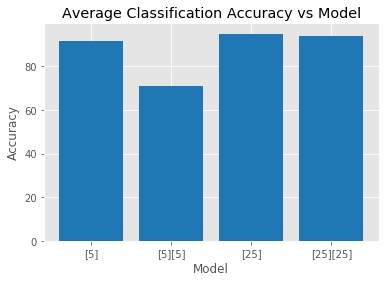

In [52]:
plt.style.use('ggplot')

neurons = ['[5]', '[5][5]', '[25]', '[25][25]' ]
accuracy = [np.mean(acc1)*100, np.mean(acc2)*100, np.mean(acc3)*100, np.mean(acc4)*100]

x_pos = [i for i, _ in enumerate(neurons)]
# x_pos=np.arange(len(neurons))


plt.bar(x_pos, accuracy, color='tab:blue')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Average Classification Accuracy vs Model")

plt.xticks(x_pos, neurons)
# plt.xticks(rotation = 90)
plt.show()

### With regularization

#### Outlining model for 1 hidden layer with 5 nodes

In [30]:
i=10
acc1_reg=[]
while i>0:
    input_size = 20
    output_size = 7
    hidden_layer_size = 5
    initial= initializers.glorot_uniform(seed=None)
    regularizer= regularizers.l2(l=0.1)
#     Sequential model is a linear stack of layers.
    model=Sequential() 
#     https://keras.io/getting-started/sequential-model-guide/
#     laying down the model- stacking the layers
#     Dense(output size) is implementing: output = activation(dot(input, weight) + bias)
    model.add(Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizer, input_shape=(20,), kernel_initializer=initial)) #1st hidden layer with 20 inputs
#     the final layer with softmax activation, gives a probability of output
    model.add(Dense(output_size, activation='softmax'))

#     Optimizer and loss function
#     https://keras.io/optimizers/, https://keras.io/losses/
    custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#     Train the model, iterating on the data in batches of 100 samples
    model.fit(trainx_set, trainy_set, epochs=100, batch_size=100, verbose=0 )
    test1_loss, test1_accuracy = model.evaluate(testx_set,testy_set, batch_size=None)
    acc1_reg.append(test1_accuracy)
    i=i-1

print('Test accuracy: ', list(np.around(acc1_reg,2)))
print('Average Test_accuracy: {0:.2f}%'.format(np.mean(acc1_reg)*100.))


300/300 [==============================] - 0s 74us/step
Test accuracy:  [0.86, 0.92, 0.86, 0.9, 0.83, 0.68, 0.86, 0.79, 0.82, 0.88]
Average Test_accuracy: 84.07%


In [31]:
#after the last hidden layer passes through softmax, it will output confidence interval for each of the 7 classes
y_predict =model.predict(testx_set, batch_size=None, verbose=0, steps=None).round(2)
print(y_predict[0:5])
print(pd.get_dummies(testy_set).head())

[[0.01 0.   0.26 0.01 0.72 0.   0.  ]
 [0.01 0.   0.   0.92 0.02 0.05 0.  ]
 [0.   0.   0.   0.   0.   0.   1.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.02 0.   0.97 0.  ]]
      1  2  3  4  5  6  7
2000  0  0  1  0  0  0  0
2001  0  0  0  1  0  0  0
2002  0  0  0  0  0  0  1
2003  0  1  0  0  0  0  0
2004  0  0  0  0  0  1  0


#### Outlining model for 2 hidden layer with 5 nodes each

In [45]:
i=10
acc2_reg=[]
while i>0:
    input_size = 20
    output_size = 7
    hidden_layer_size = 5
    initial= initializers.glorot_uniform(seed=None)
    regularizer= regularizers.l2(l=0.1)

    model=Sequential() 
    model.add(Dense(hidden_layer_size, activation='relu', input_shape=(20,), kernel_regularizer=regularizer, kernel_initializer=initial)) #1st hidden layer   
#     model.add(Dropout(0.5))
    model.add(Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizer)) #2nd hidden layer
#     model.add(Dense(hidden_layer_size, activation='relu')) # 2nd hidden layer  
#     model.add(Dropout(0.5))          
    model.add(Dense(output_size, activity_regularizer=regularizer, activation='softmax'))
    custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(trainx_set, trainy_set, epochs=100, batch_size=100, verbose=0 ) 
    test2_loss, test2_accuracy = model.evaluate(testx_set,testy_set,batch_size=None)
    acc2_reg.append(test2_accuracy)
    i=i-1
    
print('Test accuracy: ', list(np.around(acc2_reg,2)))
print('Average Test_accuracy: {0:.2f}%'.format(np.mean(acc2_reg)*100.))

300/300 [==============================] - 0s 115us/step
Test accuracy:  [0.47, 0.5, 0.15, 0.17, 0.48, 0.56, 0.51, 0.46, 0.12, 0.12]
Average Test_accuracy: 35.50%


#### Outlining model for 1 hidden layer with 25 nodes

In [38]:
i=10
acc3_reg=[]
while i>0:
    input_size = 20
    output_size = 7
    hidden_layer_size = 25
    initial= initializers.glorot_uniform(seed=None)
    regularizer= regularizers.l2(l=0.1)

    model=Sequential() 
    model.add(Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizer, input_shape=(20,), kernel_initializer=initial)) #1st hidden layer with 20 inputs
    model.add(Dense(output_size,activity_regularizer=regularizer,  activation='softmax'))
    custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(trainx_set, trainy_set, epochs=100, batch_size=100, verbose=0 )
    test3_loss, test3_accuracy = model.evaluate(testx_set,testy_set, batch_size=None)
    acc3_reg.append(test3_accuracy)
    i=i-1

print('Test accuracy: ', list(np.around(acc3_reg,2)))
print('Average Test_accuracy: {0:.2f}%'.format(np.mean(acc3_reg)*100.))

300/300 [==============================] - 0s 104us/step
Test accuracy:  [0.71, 0.67, 0.67, 0.66, 0.73, 0.72, 0.8, 0.73, 0.72, 0.73]
Average Test_accuracy: 71.40%


#### Outlining model for 2 hidden layer with 25 nodes each

In [48]:
i=10
acc4_reg=[]
while i>0:
    input_size = 20
    output_size = 7
    hidden_layer_size = 25
    initial= initializers.glorot_uniform(seed=None)
    regularizer= regularizers.l2(l=0.1)

    model=Sequential() 
    model.add(Dense(hidden_layer_size, activation='relu',kernel_regularizer=regularizer, input_shape=(20,), kernel_initializer=initial)) #1st hidden layer 
#     model.add(Dropout(0.5))
    model.add(Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizer)) #2nd hidden layer
#     model.add(Dropout(0.5))          
    model.add(Dense(output_size, activity_regularizer=regularizer, activation='softmax'))
    custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(trainx_set, trainy_set, epochs=100, batch_size=100, verbose=0 ) 
    test4_loss, test4_accuracy = model.evaluate(testx_set,testy_set,batch_size=None)
    acc4_reg.append(test4_accuracy)
    i=i-1
print('Test accuracy: ', list(np.around(acc4_reg,2)))
print('Average Test_accuracy: {0:.2f}%'.format(np.mean(acc4_reg)*100.))

300/300 [==============================] - 0s 104us/step
Test accuracy:  [0.48, 0.47, 0.54, 0.48, 0.48, 0.33, 0.52, 0.4, 0.37, 0.42]
Average Test_accuracy: 44.93%


### Plot

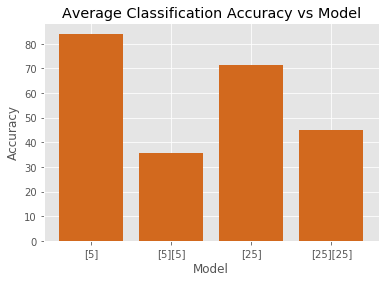

In [53]:
plt.style.use('ggplot')

neurons = ['[5]', '[5][5]', '[25]', '[25][25]' ]
accuracy_reg = [np.mean(acc1_reg)*100, np.mean(acc2_reg)*100, np.mean(acc3_reg)*100, np.mean(acc4_reg)*100]

x_pos = [i for i, _ in enumerate(neurons)]
# x_pos=np.arange(len(neurons))


plt.bar(x_pos, accuracy_reg, color='chocolate')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Average Classification Accuracy vs Model")

plt.xticks(x_pos, neurons)
# plt.xticks(rotation = 90)
plt.show()

### Grouped Plot 

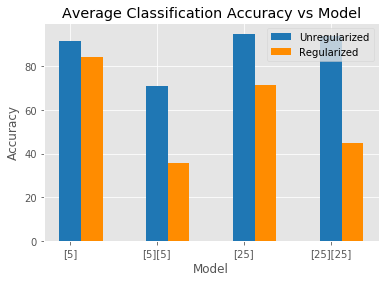

In [54]:
plt.style.use('ggplot')
labels = ['[5]', '[5][5]', '[25]', '[25][25]' ]
accuracy = [np.mean(acc1)*100, np.mean(acc2)*100, np.mean(acc3)*100, np.mean(acc4)*100]
accuracy_reg = [np.mean(acc1_reg)*100, np.mean(acc2_reg)*100, np.mean(acc3_reg)*100, np.mean(acc4_reg)*100]

x_pos = np.arange(len(accuracy))
plt.bar(x_pos + 0.00, accuracy, color = 'tab:blue', width = 0.25, label='Unregularized')
plt.bar(x_pos + 0.25, accuracy_reg, color = 'darkorange', width = 0.25, label='Regularized')
plt.xticks(x_pos, labels)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Average Classification Accuracy vs Model")
plt.legend()
plt.show()

    Obeservation: The model before having a regularization applied was giving a high test accuracy, i.e the model was not overfitting. Thus here  applying the regularization resulted in the accuracy being lower than original. Applying a lower regularization strength resulted in an increase in accuracy and increasing the strength resulted in lower accuracy